In [23]:
import pandas as pd
import numpy as np
import scipy as sp
import altair as alt
alt.renderers.enable('notebook')
alt.themes.enable('opaque')

alt.data_transformers.disable_max_rows()
df_train = pd.read_pickle('../data/interim/holdout_lgbm.pck')

df_train.head()

,row_id,well_id,GR,label,GR_medfilt,GR_diff,GR_shifted,block,GR_medfilt_lag_-50,GR_medfilt_lag_-45,...,GR_max_diff,GR_min_diff,GR_half_slope,GR_size,label_0,label_1,label_2,label_3,label_4,pred
0,0,0,99.005617,0,94.464482,NaN,NaN,0.0,46.637029,50.925787,...,11.356267,-15.411326,0.403075,42,0.775056,0.004572,0.000039,0.039488,0.011093,0
1,1,0,105.563944,0,95.934506,1.470025,NaN,0.0,46.637029,48.627032,...,11.356267,-15.411326,0.403075,42,0.860793,0.003539,0.000034,0.035152,0.008564,0
2,2,0,105.921065,0,99.005617,3.071110,NaN,0.0,44.999495,47.096457,...,11.356267,-15.411326,0.403075,42,0.954942,0.003705,0.000035,0.032250,0.006762,0
3,3,0,113.513354,0,101.523783,2.518167,NaN,0.0,44.930711,47.096457,...,11.356267,-15.411326,0.403075,42,0.985029,0.003376,0.000045,0.021360,0.005175,0
4,4,0,101.523783,0,102.486464,0.962681,NaN,0.0,44.930711,47.096457,...,11.356267,-15.411326,0.403075,42,0.979534,0.004097,0.000050,0.030150,0.005751,0


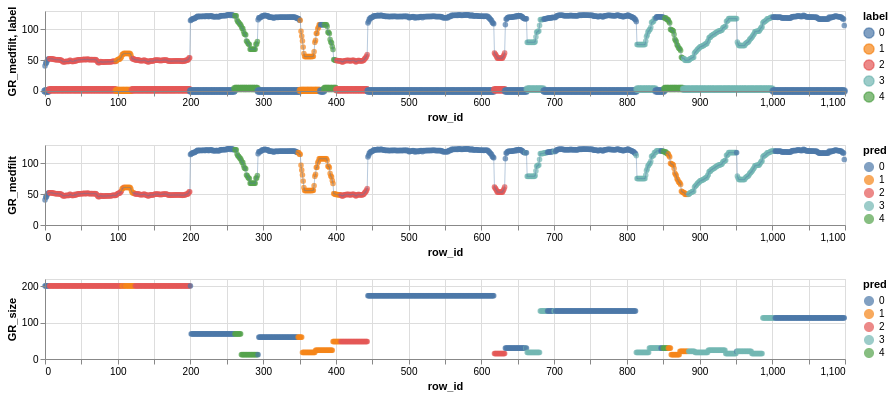

In [26]:
well_ids = 21
#well_ids = 95
#well_ids = 85 # s6ides
#well_ids  = np.random.randint(0,100,1)[0]
#well_ids = 50

df_sub = df_train[df_train['well_id'] == well_ids]
cols = df_sub.columns
ch_gr = alt.Chart(df_sub[cols],height=80,width=800).encode(x='row_id',y='GR_medfilt',order='row_id',color='label:N').mark_point(size=30,filled=True)
ch_lab = alt.Chart(df_sub[cols],height=80,width=800).encode(x='row_id',y='label',order='row_id',color='label:N').mark_point()
ch_grp = alt.Chart(df_sub[cols],height=80,width=800).encode(x='row_id',y='GR_medfilt',order='row_id',color='pred:N').mark_point(size=30,filled=True)
ch_grp_l = alt.Chart(df_sub[cols],height=80,width=800).encode(x='row_id',y='GR_medfilt',order='row_id').mark_line(size=0.4)
ch_block = alt.Chart(df_sub[cols],height=80,width=800).encode(x='row_id',y='GR_size:Q',order='row_id',color='pred:N').mark_point(size=30,filled=True)

((ch_gr + ch_lab+ch_grp_l ) & (ch_grp+ch_grp_l) & ch_block  ).resolve_scale(color='independent')

In [17]:
well_ids

21

In [17]:
well_ids

14.0

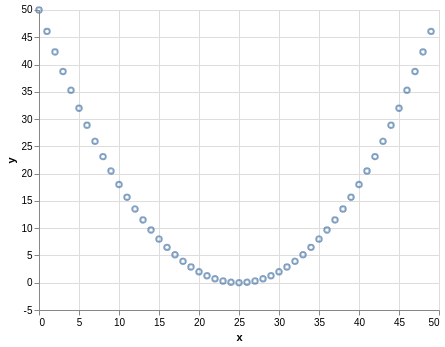

In [30]:
def make_parabolic(w,amp=50):
    x=[0,w/2,w]
    y=[amp,0,amp]
    p_coef = np.polyfit(x,y,2)
    p=np.poly1d(p_coef)
    x_new = np.arange(w)
    res = p(x_new)
    return res
    
y = make_parabolic(w=50)
tmp = pd.DataFrame({'y':y,'x':np.arange(y.shape[0])})
alt.Chart(tmp).encode(x='x',y='y').mark_point()